In [901]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [902]:
dataset = pd.read_csv('C:\\Users\\pha-a\\OneDrive\\Desktop\\4105\\D3.csv')
print(dataset)
dataset.head()
m = len(dataset)
print(m)

          X1        X2        X3         Y
0   0.000000  3.440000  0.440000  4.387545
1   0.040404  0.134949  0.888485  2.679650
2   0.080808  0.829899  1.336970  2.968490
3   0.121212  1.524848  1.785455  3.254065
4   0.161616  2.219798  2.233939  3.536375
..       ...       ...       ...       ...
95  3.838384  1.460202  3.046061 -4.440595
96  3.878788  2.155152  3.494545 -4.458663
97  3.919192  2.850101  3.943030 -4.479995
98  3.959596  3.545051  0.391515 -3.304593
99  4.000000  0.240000  0.840000 -5.332455

[100 rows x 4 columns]
100


In [903]:
x0 = np.ones((m, 1))
X = dataset.values[:,(0,1,2)]
Y = dataset.values[:,3]

print("x0 ", x0[:10])
print("X ", X[:10])

x0  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
X  [[0.         3.44       0.44      ]
 [0.04040404 0.1349495  0.88848485]
 [0.08080808 0.82989899 1.3369697 ]
 [0.12121212 1.52484848 1.78545454]
 [0.16161616 2.21979798 2.23393939]
 [0.2020202  2.91474747 2.68242424]
 [0.24242424 3.60969697 3.13090909]
 [0.28282828 0.30464646 3.57939394]
 [0.32323232 0.99959596 0.02787879]
 [0.36363636 1.69454546 0.47636364]]


Text(0.5, 1.0, 'Scatter plot of training dataset')

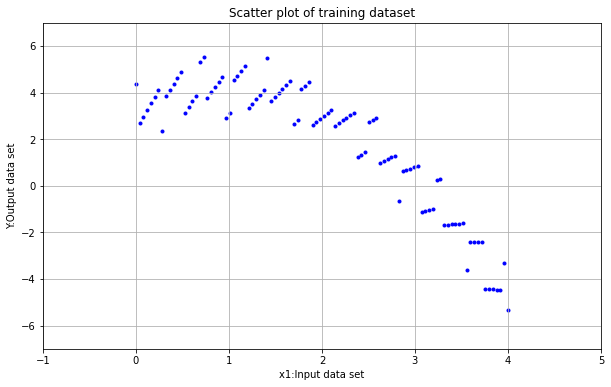

In [904]:
plt.scatter(X[:,0],Y, color='blue', marker='.')
plt.grid() 
plt.xlim([-1,5])
plt.ylim([-7,7])
plt.xlabel('x1:Input data set') 
plt.ylabel('Y:Output data set') 
plt.title('Scatter plot of training dataset') 

Text(0.5, 1.0, 'Scatter plot of training dataset')

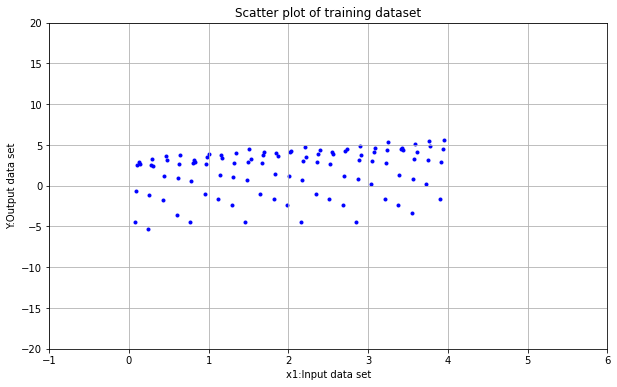

In [905]:
plt.scatter(X[:,1],Y, color='blue', marker='.')
plt.grid() 
plt.xlim([-1,6])
plt.ylim([-20,20])
plt.xlabel('x1:Input data set') 
plt.ylabel('Y:Output data set') 
plt.title('Scatter plot of training dataset') 

Text(0.5, 1.0, 'Scatter plot of training dataset')

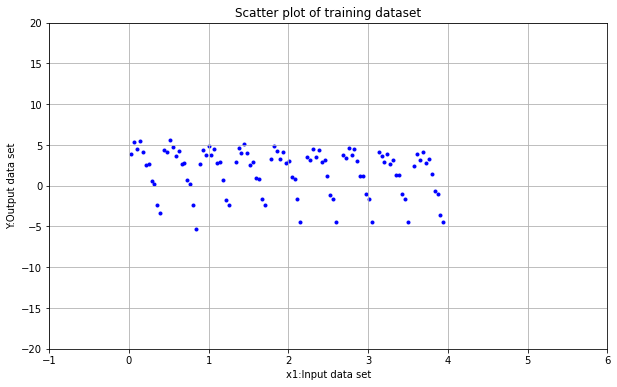

In [906]:
plt.scatter(X[:,2],Y, color='blue', marker='.')
plt.grid() 
plt.xlim([-1,6])
plt.ylim([-20,20])
plt.xlabel('x1:Input data set') 
plt.ylabel('Y:Output data set') 
plt.title('Scatter plot of training dataset') 

Text(0.5, 1.0, 'Scatter plot of training dataset')

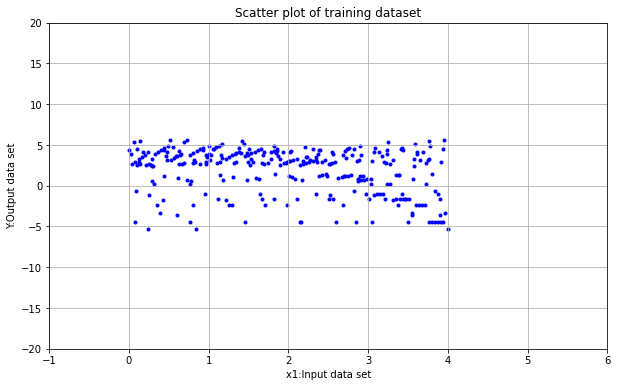

In [907]:
for i in range (0,3):
    plt.scatter(X[:,i],Y, color='blue', marker='.')
plt.grid() 
plt.xlim([-1,6])
plt.ylim([-20,20])
plt.xlabel('x1:Input data set') 
plt.ylabel('Y:Output data set') 
plt.title('Scatter plot of training dataset') 


In [908]:
X = np.hstack((x0, X))
print(X[:10])

[[1.         0.         3.44       0.44      ]
 [1.         0.04040404 0.1349495  0.88848485]
 [1.         0.08080808 0.82989899 1.3369697 ]
 [1.         0.12121212 1.52484848 1.78545454]
 [1.         0.16161616 2.21979798 2.23393939]
 [1.         0.2020202  2.91474747 2.68242424]
 [1.         0.24242424 3.60969697 3.13090909]
 [1.         0.28282828 0.30464646 3.57939394]
 [1.         0.32323232 0.99959596 0.02787879]
 [1.         0.36363636 1.69454546 0.47636364]]


In [909]:
theta = np.zeros(4)
print(theta)

[0. 0. 0. 0.]


In [910]:
def calculateCost(X, Y, theta):
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, Y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors)  
    return J

In [911]:
def gradientDescent(X, Y, theta, alpha, iter):
    cost_history = np.zeros(iter)
    
    for i in range(iter):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = calculateCost(X, Y, theta) 

    print(theta)    
    return theta, cost_history

In [912]:
cost = calculateCost(X, Y, theta)
print(cost)

5.524438459196242


In [913]:
#theta = [0., 0., 0., 0.]
iter = 2000;
alpha = 0.01;

theta, cost_history = gradientDescent(X, Y, theta, alpha, iter)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

[ 4.60784132 -1.90393905  0.64927931 -0.16206885]
Final value of theta = [ 4.60784132 -1.90393905  0.64927931 -0.16206885]
cost_history = [5.21542243 4.97171977 4.7765543  ... 0.76514569 0.76509252 0.76503946]


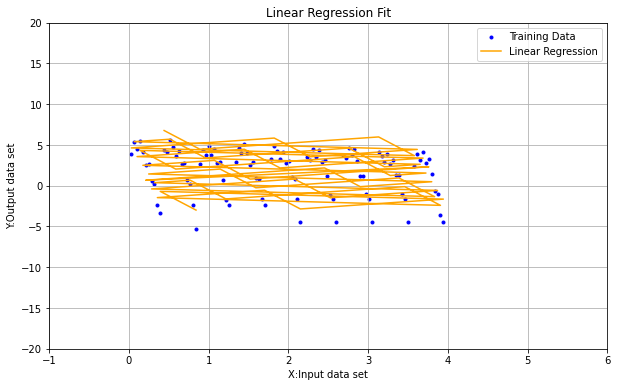

In [914]:
#for i in range(1,4):
plt.scatter(X[:,3], Y, color='blue', marker= '.', label= 'Training Data')
plt.plot(X[:,3],X.dot(theta), color='orange', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlim([-1,6])
plt.ylim([-20,20])
plt.xlabel('X:Input data set') 
plt.ylabel('Y:Output data set') 
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

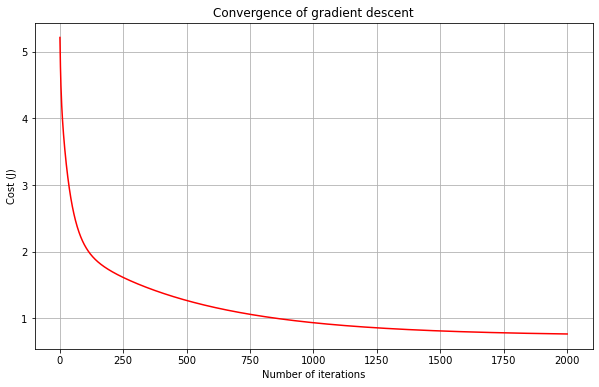

In [915]:
plt.plot(range(1, iter + 1),cost_history, color='red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')